In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [192]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [193]:
# Name of the dataset, which will be read by pandas
DATASET_NAME = 'loan.csv'
df = pd.read_csv(DATASET_NAME)

/Users/kumar.k/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [194]:
df['term'] = df['term'].apply(lambda x: x.strip().split(' ')[0])
df['term'] = df['term'].astype(int)

In [195]:
df['int_rate'] = df['int_rate'].apply(lambda x: x.strip().split('%')[0])
df['int_rate'] = df['term'].astype(float)

In [196]:
def transform_emp_duration(duration):
    if (pd.isnull(duration)):
        return np.nan
    duration = duration.strip()
    if duration == '< 1 year':
        return 0
    if duration == '10+ years':
        return 10
    return int(duration.split()[0])

In [197]:
df['emp_length'] = df['emp_length'].apply(lambda x: transform_emp_duration(x))
df['emp_length'] = pd.to_numeric(df['emp_length'], errors='coerce').astype(pd.Int64Dtype())

In [198]:
df['home_ownership'] = df['home_ownership'].replace('NONE', 'OTHER')

In [199]:
df.shape

(39717, 111)

In [200]:
null_data = df.isnull().sum()/39717*100

In [201]:
null_data

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [202]:
threshold=40
drop_columns = null_data[null_data > threshold].index

In [240]:
drop_columns

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [203]:
drop_columns.size

57

In [204]:
filtered_df = df.drop(columns=drop_columns)

In [205]:
filtered_df.shape

(39717, 54)

In [208]:
other_columns_to_drop = ['last_credit_pull_d', 'desc', 'title', 'tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'emp_title']
filtered_df = filtered_df.drop(columns=other_columns_to_drop)

KeyError: "['last_credit_pull_d' 'desc' 'title' 'tax_liens'\n 'chargeoff_within_12_mths' 'collections_12_mths_ex_med' 'emp_title'] not found in axis"

In [209]:
filtered_df.emp_title.head()

AttributeError: 'DataFrame' object has no attribute 'emp_title'

In [210]:
filtered_df.shape

(39717, 47)

In [211]:
filtered_df.revol_util.head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [212]:
def revol_util(d):
    if (pd.isnull(d)):
        return np.nan
    if type(d) == 'float':
        return d
    return float(d.split('%')[0])

In [213]:
filtered_df.revol_util = filtered_df.revol_util.apply(revol_util)

In [214]:
def write_to_file(data, path):
    with open(path, 'w') as file:
        file.write(data.to_string())

In [215]:
filtered_df.isnull().sum().sort_values(ascending=True)

id                            0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
policy_code                   0
application_type              0
acc_now_delinq                0
delinq_amnt                   0
delinq_2yrs                   0
earliest_cr_line              0
addr_state                    0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
dti     

In [216]:
write

NameError: name 'write' is not defined

In [217]:
filtered_df[filtered_df.loan_status == 'Charged Off'].groupby(['grade', 'sub_grade']).size()

grade  sub_grade
A      A1            30
       A2            74
       A3           103
       A4           178
       A5           217
B      B1           171
       B2           228
       B3           341
       B4           329
       B5           356
C      C1           336
       C2           321
       C3           270
       C4           212
       C5           208
D      D1           167
       D2           271
       D3           256
       D4           215
       D5           209
E      E1           198
       E2           163
       E3           119
       E4           126
       E5           109
F      F1            91
       F2            70
       F3            51
       F4            53
       F5            54
G      G1            31
       G2            28
       G3            19
       G4            13
       G5            10
dtype: int64

In [218]:
filtered_df[filtered_df.loan_status == 'Fully Paid'].groupby('grade').size()

grade
A     9443
B    10250
C     6487
D     3967
E     1948
F      657
G      198
dtype: int64

In [219]:
filtered_df.groupby('grade').size()

grade
A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
dtype: int64

In [220]:
filtered_df.groupby('revol_util').size()

revol_util
0.00     977
0.01       1
0.03       1
0.04       1
0.05       1
0.10      58
0.12       1
0.16       1
0.20      63
0.30      42
0.40      41
0.46       1
0.49       1
0.50      48
0.54       1
0.60      39
0.70      45
0.75       1
0.80      43
0.83       1
0.86       1
0.90      40
1.00      49
1.10      34
1.20      34
1.30      35
1.40      31
1.50      31
1.60      21
1.70      30
1.80      40
1.88       1
1.90      30
2.00      35
2.10      32
2.20      33
2.30      39
2.40      38
2.50      28
2.60      28
2.64       1
2.70      30
2.80      32
2.90      30
3.00      26
3.10      35
3.18       1
3.20      35
3.30      43
3.40      24
3.50      32
3.60      33
3.70      33
3.80      30
3.90      24
4.00      37
4.10      29
4.20      28
4.30      33
4.40      29
4.50      37
4.60      37
4.70      28
4.80      36
4.85       1
4.90      14
5.00      38
5.10      31
5.20      32
5.30      37
5.33       1
5.34       1
5.40      34
5.50      32
5.60      42
5.70      33
5

In [221]:
filtered_df.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [222]:
filtered_df.revol_util.median()

49.3

/Users/kumar.k/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


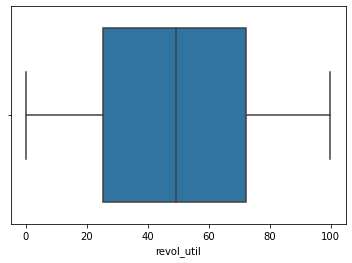

In [223]:
sns.boxplot(filtered_df.revol_util)
plt.show()

In [224]:
filtered_df.revol_util.fillna(48.8, inplace=True)

In [225]:
filtered_df.revol_util.isnull().sum()

0

In [226]:
filtered_df.last_pymnt_d.fillna('May-16', inplace=True)

In [227]:
filtered_df.last_pymnt_d.isnull().sum()

0

In [228]:
filtered_df.pub_rec_bankruptcies.mode()

0    0.0
dtype: float64

In [229]:
filtered_df.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

/Users/kumar.k/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pub_rec_bankruptcies'>

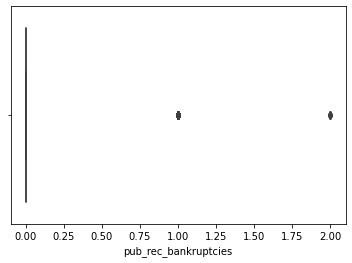

In [230]:
sns.boxplot(filtered_df.pub_rec_bankruptcies)

In [231]:
filtered_df.pub_rec_bankruptcies.fillna(0, inplace=True)

In [232]:
filtered_df.pub_rec_bankruptcies.isnull().sum()

0

In [233]:
filtered_df.groupby('emp_length').size()

emp_length
0     4583
1     3240
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
10    8879
dtype: int64

In [234]:
filtered_df[filtered_df.emp_length.isnull() == True].groupby('loan_status').size()

loan_status
Charged Off    228
Current         42
Fully Paid     805
dtype: int64

In [235]:
filtered_df[filtered_df.emp_length.isnull() == True]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
168    1067644    1302032       2500         2500      2500.000000    36   
323    1058717    1290516      18000        18000     18000.000000    60   
394    1064582    1298394       4000         4000      4000.000000    36   
422    1064366    1298164       1000         1000      1000.000000    36   
439    1063912    1296491       8250         8250      8250.000000    36   
534    1062897    1295380       1700         1700      1700.000000    36   
555    1062781    1294654       5000         5000      5000.000000    36   
562    1062535    1294602       3000         3000      3000.000000    36   
569    1036838    1266720       8575         8575      8575.000000    36   
678    1061194    1292992       5600         5600      5600.000000    36   
711    1060848    1292813       6500         6500      6500.000000    60   
750    1060485    1292242      14125        14125     14125.000000    36   
861    1059128    1290942       7000         7000      7000.000000    60   
900    1056011    1287582       2250         2250      2250.000000    36   
931    1051228    1282516       6000         6000      6000.000000    60   
973    1018385    1246619       7000         7000      7000.000000    36   
983    1057726    1289493      15000        15000     15000.000000    36   
1016   1057318    1288882      12000         9650      9650.000000    60   
1088    926180    1146931      12000        12000     12000.000000    36   
1091   1056081    1287654      15000        15000     15000.000000    36   
1121   1055716    1287282       8500         8500      8500.000000    36   
1138   1055566    1287125       5000         5000      5000.000000    36   
1146   1055300    1286863       4000         4000      4000.000000    36   
1157   1055222    1286778       5000         5000      5000.000000    36   
1173   1054702    1286555      20400        20400     20375.000000    60   
1225   1053966    1285571       5000         5000      5000.000000    36   
1256   1053445    1285040       1400         1400      1400.000000    36   
1279   1053257    1284831       9250         9250      9250.000000    36   
1311   1052258    1283811       7200         7200      7200.000000    36   
1326   1052485    1284017       5325         5325      5325.000000    36   
1336   1052397    1283921      12000        12000     11933.284910    36   
1400   1051591    1282697       8000         8000      8000.000000    36   
1406   1051328    1282620      10000        10000     10000.000000    36   
1418   1048624    1279583      16000        16000     16000.000000    60   
1424    988714    1212800      15000        15000     15000.000000    36   
1427   1051020    1282483       2125         2125      2125.000000    36   
1519   1047885    1278994      20000        20000     19975.000000    60   
1521   1049562    1280778      23000        23000     22975.000000    60   
1562   1048813    1279985      25000        25000     25000.000000    60   
1566   1048877    1280056       4800         4800      4800.000000    36   
1576   1048395    1279722      21000        21000     20875.000000    36   
1593   1047727    1278835       9000         9000      8925.000000    36   
1623   1047982    1279112      24000        24000     24000.000000    60   
1640   1030910    1260513       5000         5000      5000.000000    36   
1674   1043970    1274097      25000        25000     24950.000000    60   
1778   1031634    1261059       5000         5000      5000.000000    60   
1791   1045932    1276758      12000        12000     11925.000000    36   
1826   1045339    1275958       3200         3200      3200.000000    36   
1827   1045458    1275865      14000        14000     13875.000000    36   
1902   1044374    1274720       2500         2500      2500.000000    36   
1964   1042857    1273155      10000        10000     10000.000000    36   
1987    999353    1225132      10000        10000     10000.

In [236]:
filtered_df.shape

(39717, 47)

In [237]:
filtered_df.emp_length.fillna(10, inplace=True)

In [238]:
filtered_df.emp_length.isnull().sum()

0

In [239]:
filtered_df.emp_title.head()

AttributeError: 'DataFrame' object has no attribute 'emp_title'